In [28]:
#15.1
import random

def rollDie():
    """1から6までの整数を無作為に選んで返す"""
    return random.choice([1,2,3,4,5,6])

def rollN(n):
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

rollN(10)

4226132463


In [29]:
#15.2
def flip(numFlips):
    """numFlips: 正の整数"""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H','T')) == 'H':
            heads += 1
    return heads/numFlips

# def flipSim(numFlipsPerTrial, numTrials):
#     """numFlipsPerTrial : 一回の試行でコイン投げをする回数
#        numTrials        : 何回試行するか"""
#     fracHeads = []
#     for i in range(numTrials):
#         fracHeads.append(flip(numFlipsPerTrial))
#     mean = sum(fracHeads)/len(fracHeads)
#     return mean

# flipSim(10,1) # 10回投げる, 1試行
# flipSim(100,10000)

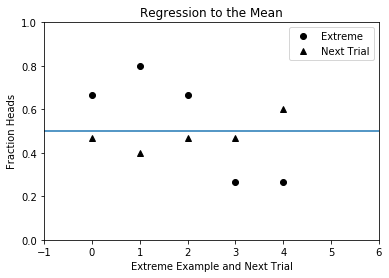

In [30]:
# 15.3
import pylab

def regressToMean(numFlips, numTrials):
    # numFlips回の試行で表が出る割合
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips)) # コイン投げで表が出る回数を試行回数分リストにしている
    # 極端な値が出る試行とその次の試行を得る
    extremes, nextTrials = [],[]
    for i in range(len(fracHeads) -1):
        if fracHeads[i] < 0.33 or fracHeads[i] > 0.66: #極端な値がでる場合
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])
    # 結果をプロットする
    pylab.plot(range(len(extremes)), extremes, 'ko', label='Extreme')
    pylab.plot(range(len(nextTrials)), nextTrials, 'k^',label='Next Trial')
    pylab.axhline(0.5)
    pylab.ylim(0,1)
    pylab.xlim(-1,len(extremes) + 1)
    pylab.xlabel('Extreme Example and Next Trial')
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc = 'best')

regressToMean(15,40)    

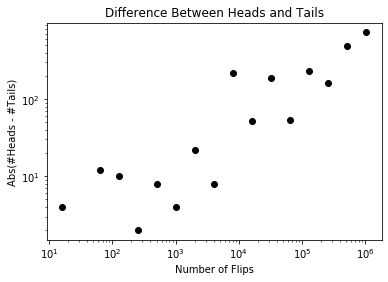

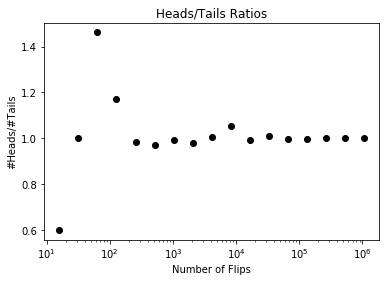

In [31]:
# 15.4
def flipPlot(minExp, maxExp):
    """minExp, maxExp: minExp < maxExpを満たす正の整数とする
    2 ** minExpから2**maxExp回のコイン投げの結果をプロットする"""
    ratios,diffs,xAxis = [],[],[]
    for exp in range(minExp,maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads=0
        for n in range(numFlips):
            if random.choice(('H','T'))=='H':
                numHeads += 1
        numTails = numFlips - numHeads # 投げた回数 - 表が出た回数=裏が出た回数
        try:
            ratios.append(numHeads/numTails) # 表が出た回数と裏が出た回数の比
            diffs.append(abs(numHeads - numTails)) # 表が出た回数と裏が出た回数の差
        except ZeroDivisionError: # 裏が一度も出なかった場合
            continue
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.xscale('log')
    pylab.yscale('log')
    pylab.plot(xAxis,diffs,'ko')
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.xscale('log')
    pylab.plot(xAxis, ratios, 'ko')

random.seed(0)
flipPlot(4,20)

In [32]:
# 15.5
def variance(X):
    """Xを数のリストとする。
       Xの分散を返す"""
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return tot/len(X)

def stdDev(X):
    """を数のリストとする。
       Xの標準偏差を返す。"""
    return variance(X)**0.5

In [33]:
# 15.6
def makePlot(xVals,yVals,title,xLabel,yLabel,style,logX=False,logY=False):
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals,yVals,style)
    if logX == True:
        pylab.semilogx()
    if logY == True:
        pylab.semilogy()

def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.choice(('H','T'))=='H':
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads,numTails)

def flipPlot1(minExp,maxExp,numTrials):
    """minExp,maxExpはminExp < maxExpを満たす正の整数。
       numTrialsは正の整数とする。
       2**minExpから2**maxExp回のコイン投げをnumTrials回行った結果の要約をプロットする"""
    ratiosMeans,diffsMeans,ratiosSDs,diffsSDs = [],[],[],[]
    xAxis = []
    for exp in range(minExp,maxExp+1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [],[]
        for t in range(numTrials):
            numHeads,numTails = runTrial(numFlips) # 表が出た回数と裏が出た回数を取得
            ratios.append(numHeads/numTails)       # 回数比をリストに格納
            diffs.append(abs(numHeads-numTails))   # 回数差をリストに格納
        ratiosMeans.append(sum(ratios)/numTrials)   # 回数比の平均を格納
        diffsMeans.append(sum(diffs)/numTrials)      # 回数差の平均を格納
        ratiosSDs.append(stdDev(ratios))           # 回数比の標準偏差を格納
        diffsSDs.append(stdDev(diffs))             # 回数差の標準偏差を格納
    numTrialsString = '(' + str(numTrials) + ' Trials)'
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis,ratiosMeans,title,'Number of flips','Mean Heads/Tails','ko',logX=True)
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis,ratiosSDs, title, 'Number of Flips','Standard Deviation','ko',logX=True,logY=True)
    title = 'Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis,diffsMeans, title, 'Number of Flips','Mean abs(#Heads - #Tails)','ko', logX=True,logY=True)
    title = 'SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis,diffsSDs,title,'Number of Flips', 'Standard Deviation', 'ko',logX=True, logY=True)

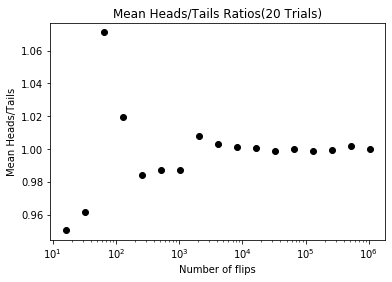

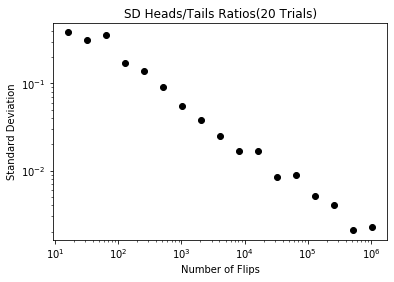

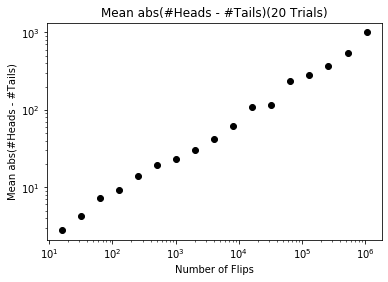

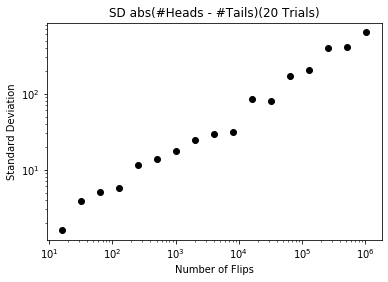

In [34]:
flipPlot1(4,20,20)

In [35]:
# 15.8 変動係数
def CV(X):
    mean = sum(X)/len(X)
    try:
        return stdDev(X)/mean
    except ZeroDivisionError:
        return float('nan')

In [36]:
# 15.9
def flipPlot2(minExp,maxExp,numTrials):
    """minExp,maxExp: minExp < maxExpを満たす正の整数とする。
       numTrialsは正の整数とする。
       2**minExpから2**maxExp回のコイン投げをnumTrials回を行った結果の要約をプロットする"""
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [],[],[],[]
    ratiosCVs, diffsCVs, xAxis = [],[],[]
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [],[]
        for t in range(numTrials):
            numHeads,numTails = runTrial(numFlips)
            ratios.append(numHeads/float(numTails))
            diffs.append(abs(numHeads-numTails))
        ratiosMeans.append(sum(ratios)/numTrials)
        diffsMeans.append(sum(diffs)/numTrials)
        ratiosSDs.append(stdDev(ratios))
        diffsSDs.append(stdDev(diffs))
        ratiosCVs.append(CV(ratios))
        diffsCVs.append(CV(diffs))
    numTrialsString = '(' + str(numTrials) + 'Trials)'
    title = 'Mean Heads/Tail Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans,title,'Number of flips','Mean Heads/Tails','ko',logX=True)
    
    title ='SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis,ratiosSDs,title,'Number of flips', 'Standard Deviation', 'ko', logX=True,logY=True)
    
    title ='Mean abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis,diffsMeans,title,'Number of flips', 'Mean abs(#Heads - #Tails)', 'ko', logX=True,logY=True)
    
    title ='SD abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis,diffsSDs,title,'Number of flips', 'Standard Deviation', 'ko', logX=True,logY=True)
    
    title ='Coeff. of Var. abs(#Heads - #Tails)' + numTrialsString
    makePlot(xAxis,diffsCVs,title,'Number of flips', 'Coeff. of Var.', 'ko', logX=True)
    
    title ='Coeff. of Var. Heads/Tails)' + numTrialsString
    makePlot(xAxis,ratiosCVs,title,'Number of flips', 'Mean abs(#Heads - #Tails)', 'ko', logX=True,logY=True)

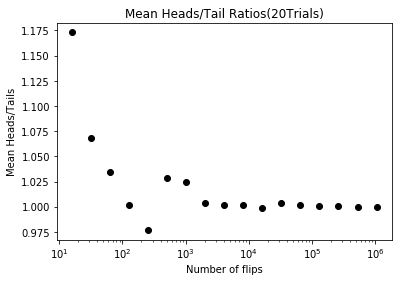

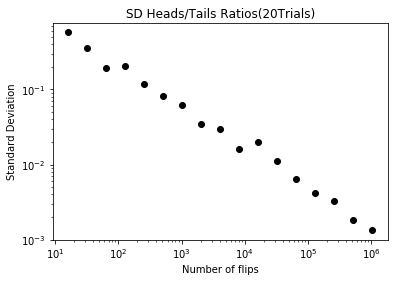

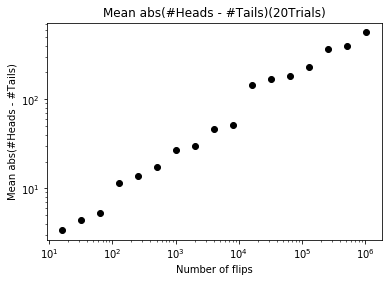

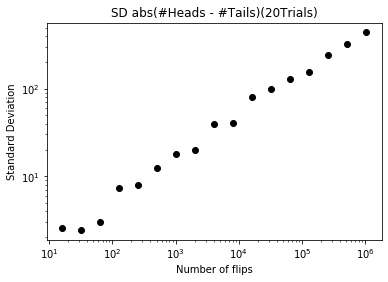

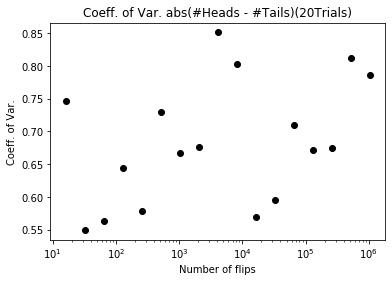

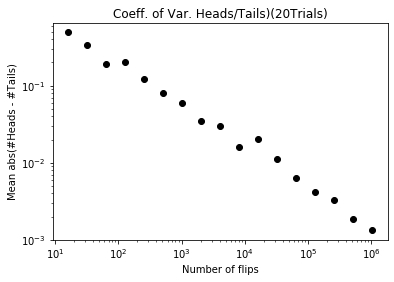

In [37]:
flipPlot2(4,20,20)

### 変動係数
- 一般に、１以下の変動係数を持つ分布では、値のばらつきが少ないと考えられる。
- 標準偏差より変動係数が優れている点は、異なる平均を持つ集合のばらつきを比較できること。（平均で割るから）
- 標準偏差より常に有用ということではない。平均が０に近いと平均の少しの変動で変動係数が大きく変化する。
- 平均が０のとき変動係数は定義されない。また、信頼区間を設定するのに使用できない。

Text(0.5, 0, 'Number of Occurrences')

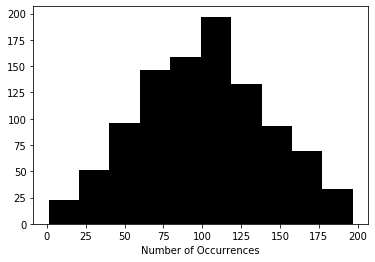

In [38]:
# 15.4 分布
# 分布
vals = []
for i in range(1000):
    num1 = random.choice(range(0,101))
    num2 = random.choice(range(0,101))
    vals.append(num1 + num2)
pylab.hist(vals,bins=10,color='k')
pylab.xlabel('Number of Occurrences')

In [39]:
# 15.10
def flip(numFlips):
    """numFlips: コイン投げを何回するか"""
    heads = 0
    for i in range(numFlips):
        if random.choice(('H','T')) == 'H':
            heads += 1
    return heads/float(numFlips) # 表(H)が出る回数

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials): # 試行回数
        fracHeads.append(flip(numFlipsPerTrial)) # 1試行当たりのコイン投げ回数
    mean = sum(fracHeads)/len(fracHeads) # 表が出た回数の平均
    sd = stdDev(fracHeads) # 表が出た回数の標準偏差
    return (fracHeads, mean, sd) # タプルで返却

def labelPlot(numFlips,numTrials,mean,sd):
    pylab.title(str(numTrials) + ' traials of' + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    pylab.annotate('Mean =' + str(round(mean,4))\
                    + '\nSD =' + str(round(sd,4)), size='x-large',
                    xycoords = 'axes fraction',xy =(0.67,0.5))

In [40]:
def makePlots(numFlips1,numFlips2,numTrials):
    val1,mean1,sd1 = flipSim(numFlips1,numTrials)
    pylab.hist(val1,bins=20)
    xmin,xmax = pylab.xlim()
    labelPlot(numFlips1,numTrials,mean1,sd1)
    pylab.figure()
    val2,mean2,sd2 = flipSim(numFlips2,numTrials)
    pylab.hist(val2,bins=20)
    pylab.xlim(xmin,xmax)
    labelPlot(numFlips2,numTrials,mean2,sd2)

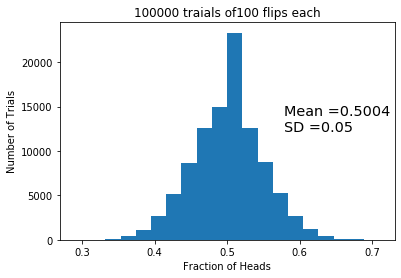

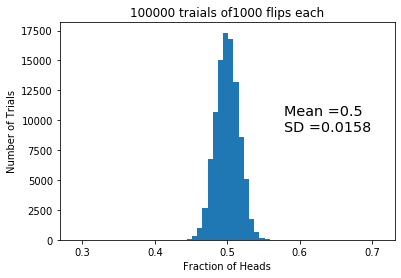

In [41]:
makePlots(100,1000,100000)

In [42]:
from scipy import integrate
import random

In [43]:
print(integrate.quad(abs, 0, 5))

(12.5, 1.3877787807814457e-13)


In [44]:
# 15.11
def gaussian(x,mu,sigma):
    factor1 = ((1.0)/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2)) # 指数部分
    return factor1 * factor2

def checkEmpirical(numTrials):
    for t in range(numTrials): # 試行回数
        mu = random.randint(-10,10) # -10~10の間でランダムに整数が選ばれる
        sigma = random.randint(1,10) # 1~10の間でランダムに整数が選ばれる
        print('For mu = ',mu,'and sigma = ',sigma)
        for numStd in (1,2,3): # 標準偏差numStd個分
            area = integrate.quad(gaussian,mu-numStd*sigma,mu+numStd*sigma,(mu,sigma))[0] # 面積を算出
            print(' Fraction within',numStd, 'std =',round(area,4))

In [45]:
checkEmpirical(3)

For mu =  0 and sigma =  3
 Fraction within 1 std = 0.6827
 Fraction within 2 std = 0.9545
 Fraction within 3 std = 0.9973
For mu =  -3 and sigma =  10
 Fraction within 1 std = 0.6827
 Fraction within 2 std = 0.9545
 Fraction within 3 std = 0.9973
For mu =  7 and sigma =  7
 Fraction within 1 std = 0.6827
 Fraction within 2 std = 0.9545
 Fraction within 3 std = 0.9973


In [50]:
# 15.12
def showErrorBars(minExp,maxExp,numTrials):
    """minExpとmaxExpは、minExp < maxExpを満たす正の整数,
       numTrialsは正の整数とする。
       表の割合の平均をエラーバー付きでプロットする。"""
    means, sds, xVals = [],[],[]                # リストの初期化
    for exp in range(minExp, maxExp+1):
        xVals.append(2**exp)
        fracHeads, mean, sd = flipSim(2**exp, numTrials)
        means.append(mean)
        sds.append(sd)
    pylab.errorbar(xVals,means,yerr=1.96*pylab.array(sds))
    pylab.semilogx()
    pylab.title('Mean Fraction of Heads (' + str(numTrials) + 'trials)')
    pylab.xlabel('Number of flips per trial')
    pylab.ylabel('Fraction of heads & 95% confidence')

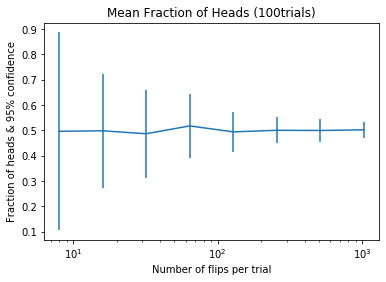

In [51]:
showErrorBars(3,10,100)

In [56]:
from math import factorial

In [61]:

# 二項係数(nCk)
def binomialCoefficient(n,k):
    return factorial(n) / (factorial(k)*factorial(n-k))

def binomialDistribution(n,k,p):
    """二項分布の値を返す。
       n: 試行回数
       k: 成功回数
       p: 成功確率"""
    return binomialCoefficient(n,k) * (p**k) * ((1-p)**(n-k))

Text(0.5, 1.0, 'binomial distribution - dice')

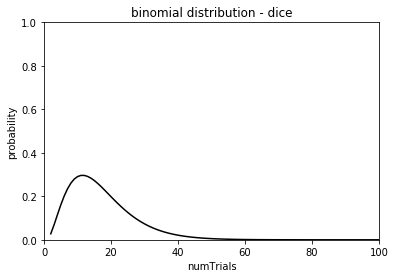

In [67]:
# 指練習
problist = [] 
for k in range(2,101):
    problist.append(binomialDistribution(k,2,1/6))
pylab.plot(range(2,101),problist,'k-')
pylab.ylim(0,1.0)
pylab.xlim(0,100)
pylab.xlabel('numTrials')
pylab.ylabel('probability')
pylab.title('binomial distribution - dice')

In [70]:
# 確率が最大の時
max_prob = max(problist)
max_ind = problist.index(max_prob)
print(max_prob,max_ind)

0.2960935686313839 9


In [78]:
# 15.4.5 指数分布と幾何分布
# 15.13
def clear(n,p,steps):
    """n と stepsは正の整数、pは浮動小数点数
       n: 分子の初期個数    0 < n
       p: 分子が消失する確率 0 < p < 1
       steps: シミュレーションのながさ"""
    numRemaining = [n] # 各時点での分子の残数
    for t in range(steps):
        numRemaining.append(n*((1-p)**t))
    pylab.plot(numRemaining)
    pylab.xlabel('Time')
    pylab.ylabel('Molecule numRemaining')
    # pylab.semilogy() # y軸をlogにした場合⇒直線を描くグラフになる。傾きは減少率になる。
    pylab.title('Clearance of Drug')

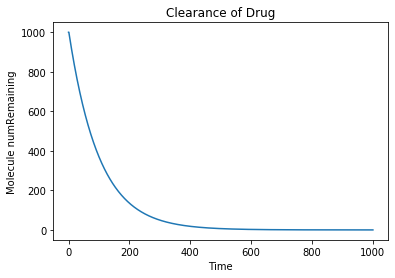

In [79]:
# 初期分子数:1000個
# 消失確率:0.01
# シミュレーション時間: 1000
clear(1000,0.01,1000) 

### memo
- 時間が経過するにつれて残存分子がゼロに近づく。漸近していく。
- 漸近するからと言って分子が体に残り続けると勘違いしてはいけない。
- 確率的なシミュレーションであるため、すべての分子が消滅するとは断定することができないとかんがえるべき。

Text(0.5, 1.0, 'Probability of Starting Each Try =0.5')

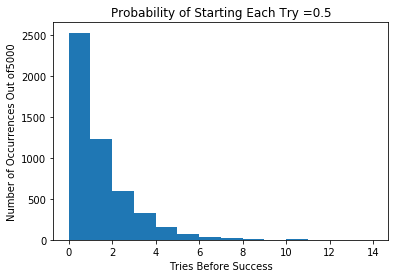

In [81]:
# 15.14
def successfulStarts(successProb, numTrials):
    """eventProb: 1回の試行で成功する確率を表す浮動小数点数
       numTrials: 正の整数
       各実験において、成功するまでに必要な試行の回数を出力する。"""
    triesBeforeSuccess = [] # 成功するまでの試行回数を格納
    for t in range(numTrials):
        consecFailures = 0
        while random.random() > successProb:    # random.random: 0 ~ 1の間の値をランダムに返す
            consecFailures += 1 # 失敗した回数をカウント
        triesBeforeSuccess.append(consecFailures)
    return triesBeforeSuccess

probOfSuccess = 0.5
numTrials = 5000
distribution = successfulStarts(probOfSuccess, numTrials) # 返り値：リストを格納
pylab.hist(distribution,bins=14)
pylab.xlabel('Tries Before Success')
pylab.ylabel('Number of Occurrences Out of' + str(numTrials))
pylab.title('Probability of Starting Each Try =' + str(probOfSuccess))

### memo
#### _ベンフォード分布_
- 最上位桁がdである可能性がP(d) = log_10(1+1/d)に等しいとき、10進数の集合はベンフォードの法則を満たすといわれる。
- この法則によると、最上位桁が1である確率は30%。フィボナッチ数がこの法則に完全に従っているらしい。
- 多様なデータがベンフォードの法則を近似的に満たすらしい。（iPhoneのパスコード、Twitterのフォロワー数、国の人口など）

### 15.5 ハッシュと衝突
K個の撫佐きいに生成した1からnまでの整数の中に、等しいものがすくなくとも2つ存在する確率を求めよ。
⇒ 逆に考えて、「K個の無作為に生成した1からnまでの整数の中に、等しいものが1つもない確率を求めよ」

In [1]:
def collisionProb(n,k):
    prob = 1.0
    for i in range(1,k):
        prob = prob * ((n-i)/n)
    return 1 - prob

In [2]:
collisionProb(1000,50)

0.7122686568799875

In [3]:
collisionProb(200,50)

0.9987739859535786

In [13]:
import random
import pylab

In [14]:
# 15.5
def simInsertions(numIndices, numInsertions):
    """numIndices と numInsertionsは正の整数
       衝突が起これば1、そうでなければ0を出力する"""
    choices = range(numIndices) # list of possible indices
    used = []
    for i in range(numInsertions):
        hashVal = random.choice(choices)
        if hashVal in used : # there is a collision
            return 1
        else:
            used.append(hashVal)
    return 0

def findProb(numIndices,numInsertions,numTrials):
    collisions = 0
    for t in range(numTrials):
        collisions += simInsertions(numIndices,numInsertions)
    return collisions/numTrials

In [15]:
print('Actual probability of a collision =', collisionProb(1000,50))
print('Est. probability of a collision =', findProb(1000,50,10000))
print('Actual probability of a collision =', collisionProb(1000,200))
print('Est. probability of a collision =', findProb(1000,200,1000))

Actual probability of a collision = 0.7122686568799875
Est. probability of a collision = 0.7072
Actual probability of a collision = 0.9999999994781328
Est. probability of a collision = 1.0


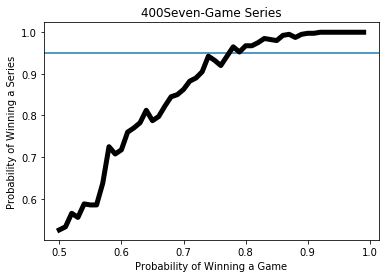

In [16]:
# 15.6 良いチームはどれくらい勝つ
# 15.16
def playSeries(numGames, teamProb):
    numWon = 0
    for game in range(numGames):
        if random.random() <= teamProb:
            numWon += 1
    return (numWon > numGames//2)

def fractionWon(teamProb, numSeries, seriesLen):
    won = 0
    for series in range(numSeries):
        if playSeries(seriesLen,teamProb):
            won += 1
    return won/float(numSeries)

def simSeries(numSeries):
    prob = 0.5 # 1試合で勝つ確率を0.5以上としている
    fracsWon, probs = [],[]
    while prob <= 1.0: # 勝つ確率を0.01ずつ上げていった場合のシミュレーション
        fracsWon.append(fractionWon(prob,numSeries,7)) # prob=0.5, 試行回数, 試合数=7
        probs.append(prob)
        prob += 0.01
    pylab.axhline(0.95) # Draw line at 95%
    pylab.plot(probs, fracsWon, 'k', linewidth=5)
    pylab.xlabel('Probability of Winning a Game') # 優秀なチームが1つの試合に勝つ確率
    pylab.ylabel('Probability of Winning a Series') # 優秀なチームがワールドシリーズで優勝する確率
    pylab.title(str(numSeries)+'Seven-Game Series')

simSeries(400)